In [270]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as pp
from  sklearn import preprocessing
#%matplotlib inline

In [271]:
#loading data
data=pd.read_excel('data_complete_shuffled.xls')
data.head()

,Crop,year,Area Harvested - Ha,Production Quantity - tonnes,Yield - Hg/Ha
0,grape,1993,6000,1200000,18432
1,rice,1978,6300000,73352000,19623
2,barley,1985,70000,104225008,258628
3,tomato,1963,434000,24734608,343061
4,pineapple,1998,12572000,246806,137248


In [272]:
#prediction will be done according to different crops as one will not 
#depend on other and hence distort the graph for others.
crop_name='banana' #let, this variable will be used always
#filter data according to crop_name
data=data.loc[data['Crop']==crop_name]
#now sorted so that we could only take last 10 years to predict next
data=data.sort_values(by='year',ascending=True).drop('Crop',axis=1).drop('Production Quantity - tonnes',axis=1)
data.tail()

,year,Area Harvested - Ha,Yield - Hg/Ha
542,2002,230000,19377
491,2003,70000,27131
609,2004,35474,136787
389,2004,1221900,9954
96,2007,190000,669281


In [ ]:
#NOT NEEDED as we have filtered above according to crop and removed 'Crop' column

# #creating labelEncoder
# encoder=preprocessing.LabelEncoder()#creating object
# encoder.fit(data['Crop'])#fitting 'string labels' with encode as integers
# #transform - convert string to number, inverse_transform -convert number to string
# X['crop']=encoder.transform(data['Crop'])
# #encoder.inverse_transform(0)
# #removing the X['Crop'] column
# X.drop(inplace=True,axis=1,labels='Crop')


In [277]:

X,y=data.iloc[:,0:-1],data.iloc[:,-1:]
X.tail()# all columns other than last
#y.tail()#only last column, Yeild

,year,Area Harvested - Ha
542,2002,230000
491,2003,70000
609,2004,35474
389,2004,1221900
96,2007,190000


In [284]:
X=X[-10:]
y=y[-10:]#last 10

In [286]:
"""
as fit() method can't use 'string' and out "Crop" column has string so we have to transform into intergers
method 1 - find number of classes and assign unique id manually
method 2 - let python do that for us ,using 'labelEncoder' class
"""
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [288]:
model.fit(X[::2],y[::2])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [290]:
model.score(X[:],y[:])

-2.6164017989666579

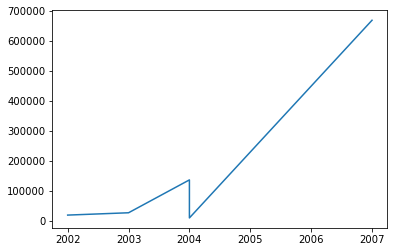

In [287]:
pp.plot(X['year'][-10:],y[-10:])

In [254]:
data.head()

,Crop,year,Area Harvested - Ha,Production Quantity - tonnes,Yield - Hg/Ha
0,grape,1993,6000,1200000,18432
1,rice,1978,6300000,73352000,19623
2,barley,1985,70000,104225008,258628
3,tomato,1963,434000,24734608,343061
4,pineapple,1998,12572000,246806,137248


In [211]:
l=data.loc[data['Crop']=='tea'][['year','Yield - Hg/Ha']]

In [230]:
l.sort_values(by='year',inplace=True)
l

,year,Yield - Hg/Ha
477,1962,15086
575,1963,155739
639,1964,193671
245,1964,665203
526,1965,150160
475,1966,11392
516,1969,93396
336,1970,93283
632,1971,104901
371,1972,161607


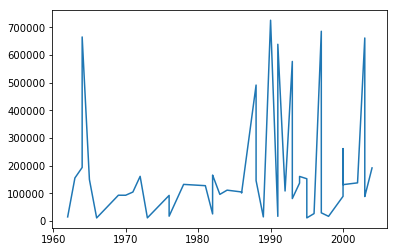

In [231]:
pp.plot(l['year'],l['Yield - Hg/Ha'])

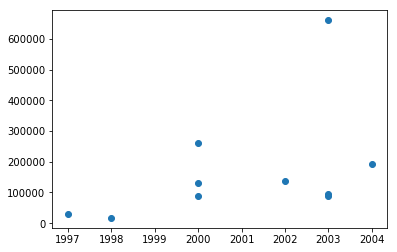

In [250]:
m=l.iloc[-10:]
pp.scatter(m['year'],m['Yield - Hg/Ha'])